# Mejorar entrenamiento con data augmentation. 

Keras proporciona la clase ImageDataGenerator que define la configuración para la preparación y el aumento de los datos de imagen. Esto incluye capacidades como:

* Estandarización de características.
* Blanqueo ZCA.
* Rotación, desplazamiento, cizallamiento y volteo aleatorios.
* Reordenación de las dimensiones.
* Guarda las imágenes aumentadas en el disco.

Para crear un generador de augmented image ocupamos la siguente linea:  

* datagen = ImageDataGenerator()

Después de haber creado el ImageDataGenerator(), se debe ajustar a nuestros datos.

* datagen.fit(train)

El generador de datos es un iterador que devuelve lotes de imágenes si es que se quiere. 
Podemos configurar el tamaño del lote y preparar el generador de datos llamando a la función flow() que devuelve lotes de imagenes.


* X_batch, y_batch = datagen.flow(train, train, batch_size=32)

Para hacer uso del generador de datos llamamos a la función a fit_generator() y pasar la longitud deseada de una época, así como el número total de épocas en las que entrenar.

* fit_generator(datagen, samples_per_epoch=len(train), nb_epoch=100)

## Punto de comparación para el data augmentation. 

Using TensorFlow backend.


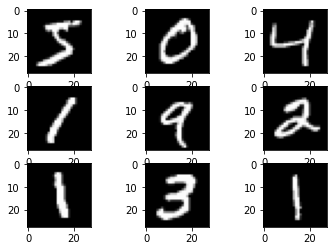

In [1]:
# Plot of images as baseline for comparison
from keras.datasets import mnist
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(331 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap( "gray" ))
    # show the plot
pyplot.show()

## Estandarización de características

In [2]:
from keras.preprocessing.image import ImageDataGenerator

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# convert from int to float
X_train = X_train.astype( "float32" )
X_test = X_test.astype( "float32" )



In [3]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28, 1)


* Normalización de píxeles: escalar los valores de los píxeles al rango 0-1.

* Centrado de píxeles: escalar los valores de los píxeles para que tengan una media cero.

* Estandarización de píxeles: escala los valores de los píxeles para que tengan una media cero y una varianza unitaria.

In [4]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format='channels_last', validation_split=0.0, interpolation_order=1, dtype='float32')
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |   The data will be looped over (in batches).
 |  
 |  # Arguments
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each

In [5]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True,
                        featurewise_std_normalization=True)#featurewise_center=True, featurewise_std_normalization=True)

In [6]:
# fit parameters from data
datagen.fit(X_train)

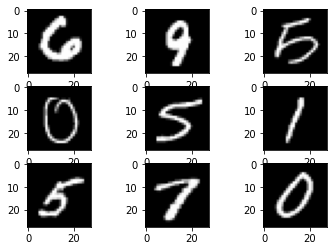

In [7]:
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap("gray"))
        # show the plot
    pyplot.show()
    break

Train 0.0 255.0 33.318447 78.567444
Test 0.0 255.0 33.79124 79.172455
